In [105]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt

In [106]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
import seaborn as sns
sns.set()

In [109]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [110]:
from sklearn.model_selection import KFold, StratifiedKFold

In [158]:
train = pd.read_csv("../data/dacon_galaxy/galaxy_train.csv", index_col=0)
test = pd.read_csv('../data/dacon_galaxy/galaxy_test.csv', index_col=0)
sample_submission = pd.read_csv('../data/dacon_galaxy/sample_submission.csv', index_col=0)

In [159]:
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x: to_number(x, column_number))

In [160]:
train.head()

,type,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,...,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,type_num
id,,,,,,,,,,,,,,,,,,,,,
0,QSO,601,23.198224,21.431953,21.314148,21.176553,21.171444,22.581309,21.644453,21.657571,...,21.431636,21.478312,21.145409,20.422446,22.749241,21.465534,21.364187,21.020605,21.147340,8
1,QSO,788,21.431355,20.708104,20.678850,20.703420,20.473229,21.868797,21.029773,20.967054,...,20.778968,20.889705,20.639812,20.646660,21.492955,20.758527,20.753925,20.693389,20.512314,8
2,QSO,427,17.851451,16.727898,16.679677,16.694640,16.641788,18.171890,17.033098,16.999682,...,16.738784,16.688874,16.744210,16.808006,17.818063,16.697434,16.641249,16.660177,16.688928,8
3,QSO,864,20.789900,20.040371,19.926909,19.843840,19.463270,21.039030,20.317165,20.217898,...,19.993727,19.985531,19.750917,19.455117,20.770711,20.001699,19.889798,19.758113,19.552855,8
4,STAR_RED_DWARF,612,26.454969,23.058767,21.471406,19.504961,18.389096,25.700632,23.629122,21.742750,...,22.426929,21.673551,19.610012,18.376141,24.877052,23.147993,21.475342,19.487330,18.375655,10


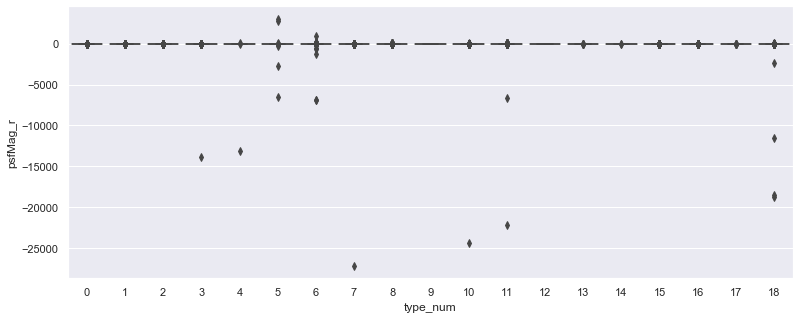

In [161]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (13,5)

sns.boxplot('type_num', 'psfMag_r', data=train)

In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199991 entries, 0 to 199990
Data columns (total 23 columns):
type          199991 non-null object
fiberID       199991 non-null int64
psfMag_u      199991 non-null float64
psfMag_g      199991 non-null float64
psfMag_r      199991 non-null float64
psfMag_i      199991 non-null float64
psfMag_z      199991 non-null float64
fiberMag_u    199991 non-null float64
fiberMag_g    199991 non-null float64
fiberMag_r    199991 non-null float64
fiberMag_i    199991 non-null float64
fiberMag_z    199991 non-null float64
petroMag_u    199991 non-null float64
petroMag_g    199991 non-null float64
petroMag_r    199991 non-null float64
petroMag_i    199991 non-null float64
petroMag_z    199991 non-null float64
modelMag_u    199991 non-null float64
modelMag_g    199991 non-null float64
modelMag_r    199991 non-null float64
modelMag_i    199991 non-null float64
modelMag_z    199991 non-null float64
type_num      199991 non-null int64
dtypes: float64(20),

In [163]:
train.groupby('type_num')['psfMag_u'].mean()

type_num
0     19.266131
1     21.305009
2     24.338437
3     17.779457
4     17.070950
5     15.393426
6     20.622170
7     16.557559
8    -85.199553
9     23.921169
10    23.815394
11    15.694291
12    20.496897
13    22.724376
14    21.898301
15    17.556243
16    23.328482
17    22.295601
18    17.814982
Name: psfMag_u, dtype: float64

## Outlier 제거

In [164]:
for column in train.columns[2:-1]:
    train = train.drop(index=train[(train[column] < -300) | (train[column] > 800)].index)

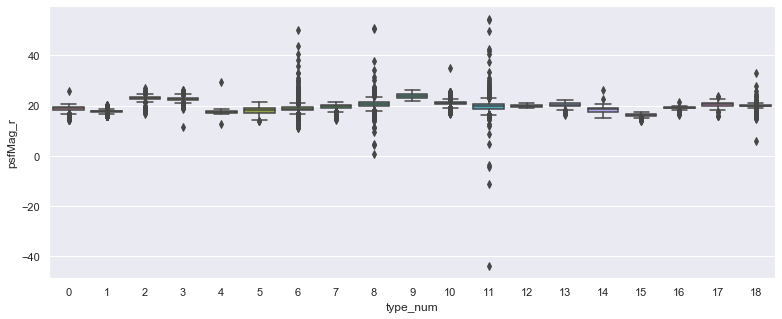

In [166]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (13,5)

sns.boxplot('type_num', 'psfMag_r', data=train)

In [167]:
train_X = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test

In [169]:
train['type'].value_counts()

QSO                    49677
GALAXY                 37331
SERENDIPITY_BLUE       21756
SPECTROPHOTO_STD       14629
REDDEN_STD             14615
STAR_RED_DWARF         13749
STAR_BHB               13494
SERENDIPITY_FIRST       7132
ROSAT_D                 6570
STAR_CATY_VAR           6505
SERENDIPITY_DISTANT     4653
STAR_CARBON             3257
SERENDIPITY_RED         2561
STAR_WHITE_DWARF        2160
STAR_SUB_DWARF          1154
STAR_BROWN_DWARF         500
SKY                      127
SERENDIPITY_MANUAL        61
STAR_PN                   13
Name: type, dtype: int64

In [170]:
X_train, X_test, y_train, y_test = train_test_split(train_X, 
                                                    train_y, 
                                                    stratify = train_y,
                                                    test_size=0.2, 
                                                    random_state=1234)

### stratifiedKFold를 사용하자

In [171]:
#kfold = KFold(n_splits=6, random_state= 0, shuffle = True)
kfold_s = StratifiedKFold(n_splits=6, random_state= 0, shuffle = True)

# Xgboost

In [172]:
import xgboost as xgb
from xgboost import XGBClassifier

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [173]:
XGBC = XGBClassifier(n_jobs=-1, random_state=1234)
xgc_param_grid = {
    'n_estimators' : [50, 60, 70],
    'learning_rate' :[0.1],
    'eta': np.arange(0,0.3,0.1),
    'min_child_weight' : np.arange(4,7,1),
    'max_depth' : np.arange(3,6,1)
}

In [174]:
n_iter_search = 10
xgv = RandomizedSearchCV(XGBC, 
                             xgc_param_grid, 
                             cv=kfold_s,
                             n_jobs=-1,
                             random_state=1234,
                             scoring='neg_log_loss',
                            n_iter=n_iter_search)
xgv.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=6, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='warn', n_iter=10, n_jobs=-1,
                   para

In [175]:
xgv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.2, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=70, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=1234,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [176]:
xgv.best_score_

-0.44206200326284645

In [22]:
XGV_best = xgv.best_estimator_
y_pred = XGV_best.predict_proba(test_x)

In [23]:
submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
submission.to_csv('submission_xgb.csv', index=True)